In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
cd D:\Shakeer\Kaggle projects\Titanic

D:\Shakeer\Kaggle projects\Titanic


In [3]:
titanic=pd.read_csv('train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


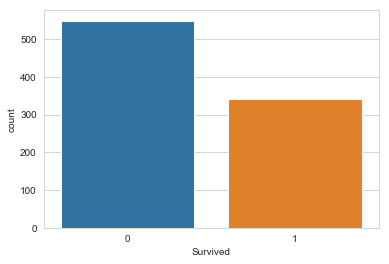

In [8]:
sb.set_style('whitegrid')
sb.countplot(titanic['Survived'])

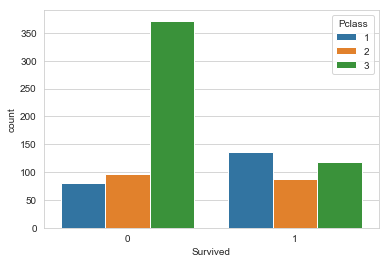

In [9]:
sb.countplot(titanic['Survived'],hue=titanic['Pclass'])

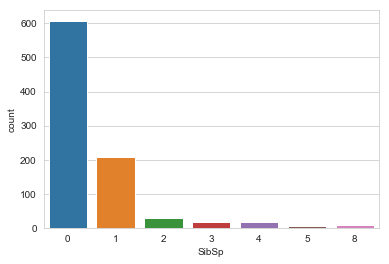

In [10]:
sb.countplot(titanic['SibSp'])

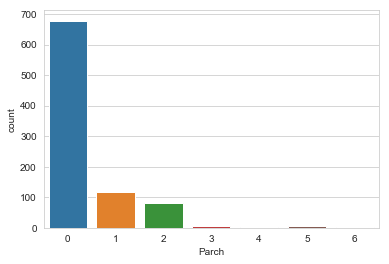

In [11]:
sb.countplot(titanic['Parch'])

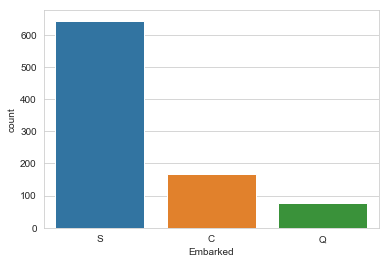

In [12]:
sb.countplot(titanic['Embarked'])

In [13]:
titanic['Embarked']=titanic['Embarked'].fillna('S')

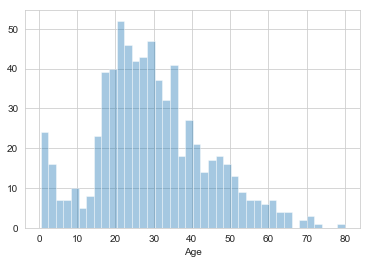

In [14]:
sb.distplot(titanic['Age'].dropna(),bins=40,kde=False)

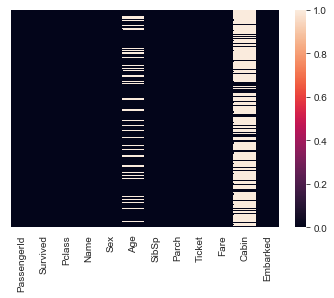

In [15]:
sb.heatmap(titanic.isnull(),yticklabels=False)

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic.drop(['PassengerId','Name','Fare','Cabin','Ticket'],axis=1,inplace=True)

In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


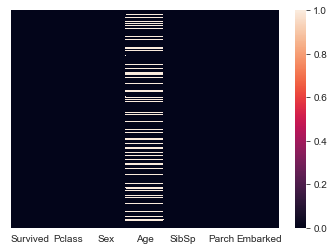

In [19]:
sb.heatmap(titanic.isnull(),yticklabels=False)

In [20]:
titanic_nw=pd.get_dummies(titanic)

In [21]:
titanic_nw

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
5,0,3,NaN,0,0,0,1,0,1,0
6,0,1,54.0,0,0,0,1,0,0,1
7,0,3,2.0,3,1,0,1,0,0,1
8,1,3,27.0,0,2,1,0,0,0,1
9,1,2,14.0,1,0,1,0,1,0,0


In [22]:
from missingpy import KNNImputer

In [23]:
titanic=pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(titanic_nw))

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


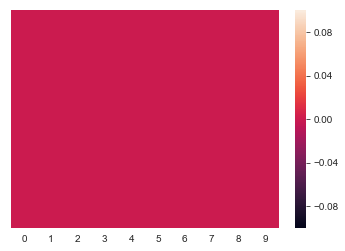

In [24]:
sb.heatmap(titanic.isnull(),yticklabels=False)

In [25]:
titanic.columns=titanic_nw.columns

In [26]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
titanic.shape

(891, 10)

In [28]:
titanic.skew()

Survived      0.478523
Pclass       -0.630548
Age           0.302718
SibSp         3.695352
Parch         2.749117
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -1.009665
dtype: float64

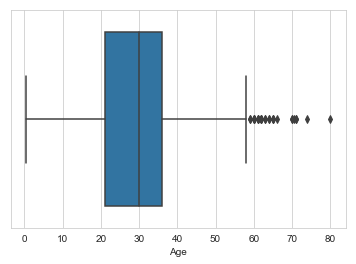

In [29]:
sb.boxplot(titanic['Age'])

In [30]:
x=titanic.drop(['Survived'],axis=1)
x

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,3.0,35.3,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,1.0,54.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,3.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0
8,3.0,27.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
9,2.0,14.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
y=titanic['Survived']
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
      ... 
861    0.0
862    1.0
863    0.0
864    0.0
865    1.0
866    1.0
867    0.0
868    0.0
869    1.0
870    0.0
871    1.0
872    0.0
873    0.0
874    1.0
875    1.0
876    0.0
877    0.0
878    0.0
879    1.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
lreg=LogisticRegression()
lreg=lreg.fit(x_train,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
print(lreg.coef_)
print(lreg.intercept_)

[[-1.08197358 -0.04542581 -0.41148216 -0.01833052  2.30439201 -0.178083
   0.80800924  0.78559773  0.53270203]]
[2.12630901]


In [35]:
y_predict=lreg.predict(x_test)
print(y_predict)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]


In [36]:
cm=confusion_matrix(y_test,y_predict)
print("Confusion Matrix is:", cm,sep='\n')

Confusion Matrix is:
[[96 14]
 [18 51]]


In [37]:
cm_df=pd.DataFrame(cm)
cm_df.columns=['Predicted 0','Predicted 1']
cm_df=cm_df.rename(index={0:'Actual 0',1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,96,14
Actual 1,18,51


In [38]:
Tot=cm_df.sum()[0]+cm_df.sum()[1]
Tot

179

In [39]:
True_values=(cm_df['Predicted 0'][0]+cm_df['Predicted 1'][1])
True_values

147

In [40]:
Accuracy=(True_values/Tot)*100
Accuracy

82.12290502793296

In [41]:
# KNN Means Clustering

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

88.2

In [43]:
# Decision Tree

In [44]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_predict = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

95.51

In [45]:
titanic.shape

(891, 10)

In [46]:
titanic_test=pd.read_csv("test.csv")

In [47]:
titanic_test.shape

(418, 11)

In [48]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
titanic_pid=titanic_test['PassengerId']

In [50]:
titanic_test.drop(['PassengerId','Name','Fare','Cabin','Ticket'],axis=1,inplace=True)

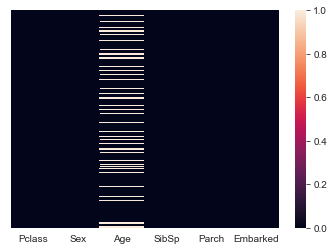

In [51]:
sb.heatmap(titanic_test.isnull(),yticklabels=False)

In [52]:
titanic_test_nw=pd.get_dummies(titanic_test)

In [53]:
titanic_test_nw

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,0,1,0,1,0
1,3,47.0,1,0,1,0,0,0,1
2,2,62.0,0,0,0,1,0,1,0
3,3,27.0,0,0,0,1,0,0,1
4,3,22.0,1,1,1,0,0,0,1
5,3,14.0,0,0,0,1,0,0,1
6,3,30.0,0,0,1,0,0,1,0
7,2,26.0,1,1,0,1,0,0,1
8,3,18.0,0,0,1,0,1,0,0
9,3,21.0,2,0,0,1,0,0,1


In [54]:
titanic_test=pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(titanic_test_nw))
titanic_test

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


,0,1,2,3,4,5,6,7,8
0,3.0,34.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.0,47.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,62.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
5,3.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,3.0,30.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,2.0,26.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8,3.0,18.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,3.0,21.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0


In [55]:
titanic_test.columns=titanic_test_nw.columns

In [56]:
titanic_test.head()



,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,34.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,3.0,47.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,62.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [57]:
titanic_test.shape

(418, 9)

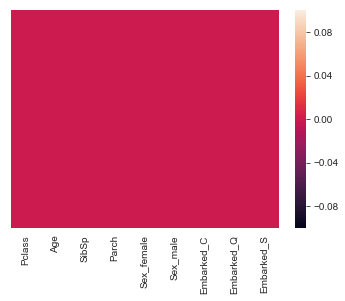

In [58]:
sb.heatmap(titanic_test.isnull(),yticklabels=False)

In [59]:
y_predict=decision_tree.predict(titanic_test)

In [60]:
y_predict

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0.

In [61]:
final_predict=pd.DataFrame(y_predict.astype(int),titanic_pid.astype(int))

In [62]:
final_predict.rename(columns={0:'Survived'},inplace=True)

In [68]:
final_predict.reset_index(inplace=True)

In [69]:
final_predict.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [70]:
#final_predict.astype(int)

In [73]:
final_predict.to_csv('final_submission.csv')

In [72]:
type(final_predict['PassengerId'][0])

numpy.int64